 <font size = 1000px color = 'royalblue'><center><b>Pima Indians Diabetes<b></center></font>
 

<hr>
<p>
- <font size="4px"><b> Context:</b></font>

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

- <font size="4px"><b> Problem Statement:</b></font>

Build a model to accurately predict whether the patients in the dataset have diabetes or not?

- <font size="4px"><b> Context: </b></font>

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.


1. <b>Pregnancies:</b> Number of times pregnant

2. <b>Glucose:</b> Plasma glucose concentration a 2 hours in an oral glucose tolerance test

3. <b>BloodPressure:</b> Diastolic blood pressure (mm Hg)

4. <b>SkinThickness:</b> Triceps skin fold thickness (mm)

5. <b>Insulin:</b> 2-Hour serum insulin (mu U/ml)

6. <b>BMI:</b> Body mass index (weight in kg/(height in m)^2)

7. <b>DiabetesPedigreeFunction:</b> Diabetes pedigree function

8. <b>Age:</b> Age (years)

9. <b>Outcome:</b> Class variable (0 or 1) 268 of 768 are 1, the others are 0

- <font size="4px"><b> Work Flow: </b></font>

1. Acquire the Data
2. Data Exploration
3. Check For Correlation Among Features and Between Features and Target
4. Creating New Features That May Impact Significance in prediction
5. Data Cleaning and Preprocessing/ Feature Engineering
6. Feature Selection using Random Forest
7. Evaluating Different Models
8. Selecting Model With Best Score And Predicting the unseen Test data to Model

<p>

    
    
    
<hr>


<font color = "#191970" size=6px><center><b>Import Required Libraries</b></font>

In [1]:
#!pip install lightgbm

In [2]:
# Data Wrangling and Data Analysis

import pandas as pd , numpy as np

# Visualization

from matplotlib import pyplot as plt, style
import matplotlib
import seaborn as sns
import plotly



# Feature Engineering / Feature Selection

from sklearn.feature_selection import  VarianceThreshold
from sklearn import model_selection
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import scipy.stats as stats
from sklearn import base
import optuna
from optuna.integration import LightGBMPruningCallback
from optuna import Trial, visualization
from functools import partial
from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler
from optuna.integration import OptunaSearchCV
from sklearn.neighbors import KNeighborsClassifier


# Model Building

from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn import metrics

# Ignore Warings

import warnings
warnings.filterwarnings("ignore")

<font color = "#191970" size=6px><center><b>1. Data Collection</b></font>

In [3]:
df = pd.read_csv("health care diabetes.csv")

df.head(5)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

<font color = "#191970" size=6px><center><b>2. Data Cleaning and EDA</b></font>

<font color = "maroon" size=5px><b>2.1 lets check shape of data</b></font>

In [4]:
df.shape

(768, 9)

<font color = "maroon" size=5px><b>2.2 lets check Summary Statisrics of the data</b></font>

In [5]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

<font color = "blue" size=4.8px> <b>Interpretation : </b></font>

* <font color = "red" size=4.8px>How can <b>Glucose</b>, <b>Blood Pressure</b>, <b>Skin Thickness</b>, <b>Insulin</b> and <b>BMI be <b>Zero</b> ?</font>
* <font color = "red" size=4.8px>There Must be <b>Missing Value</b> Indicating <b>Zero</b> for Particular Entry, Lets Make those Entry as <b>Nan</b> for applying Imputation Techniques</font>
* <font color = "red" size=4.8px>Looks Data is Skewed for Insulin , lets Confirm by Visualization</font>    

<font color = "maroon" size=5px><b>2.3 lets check for Distribution of Data</b></font>

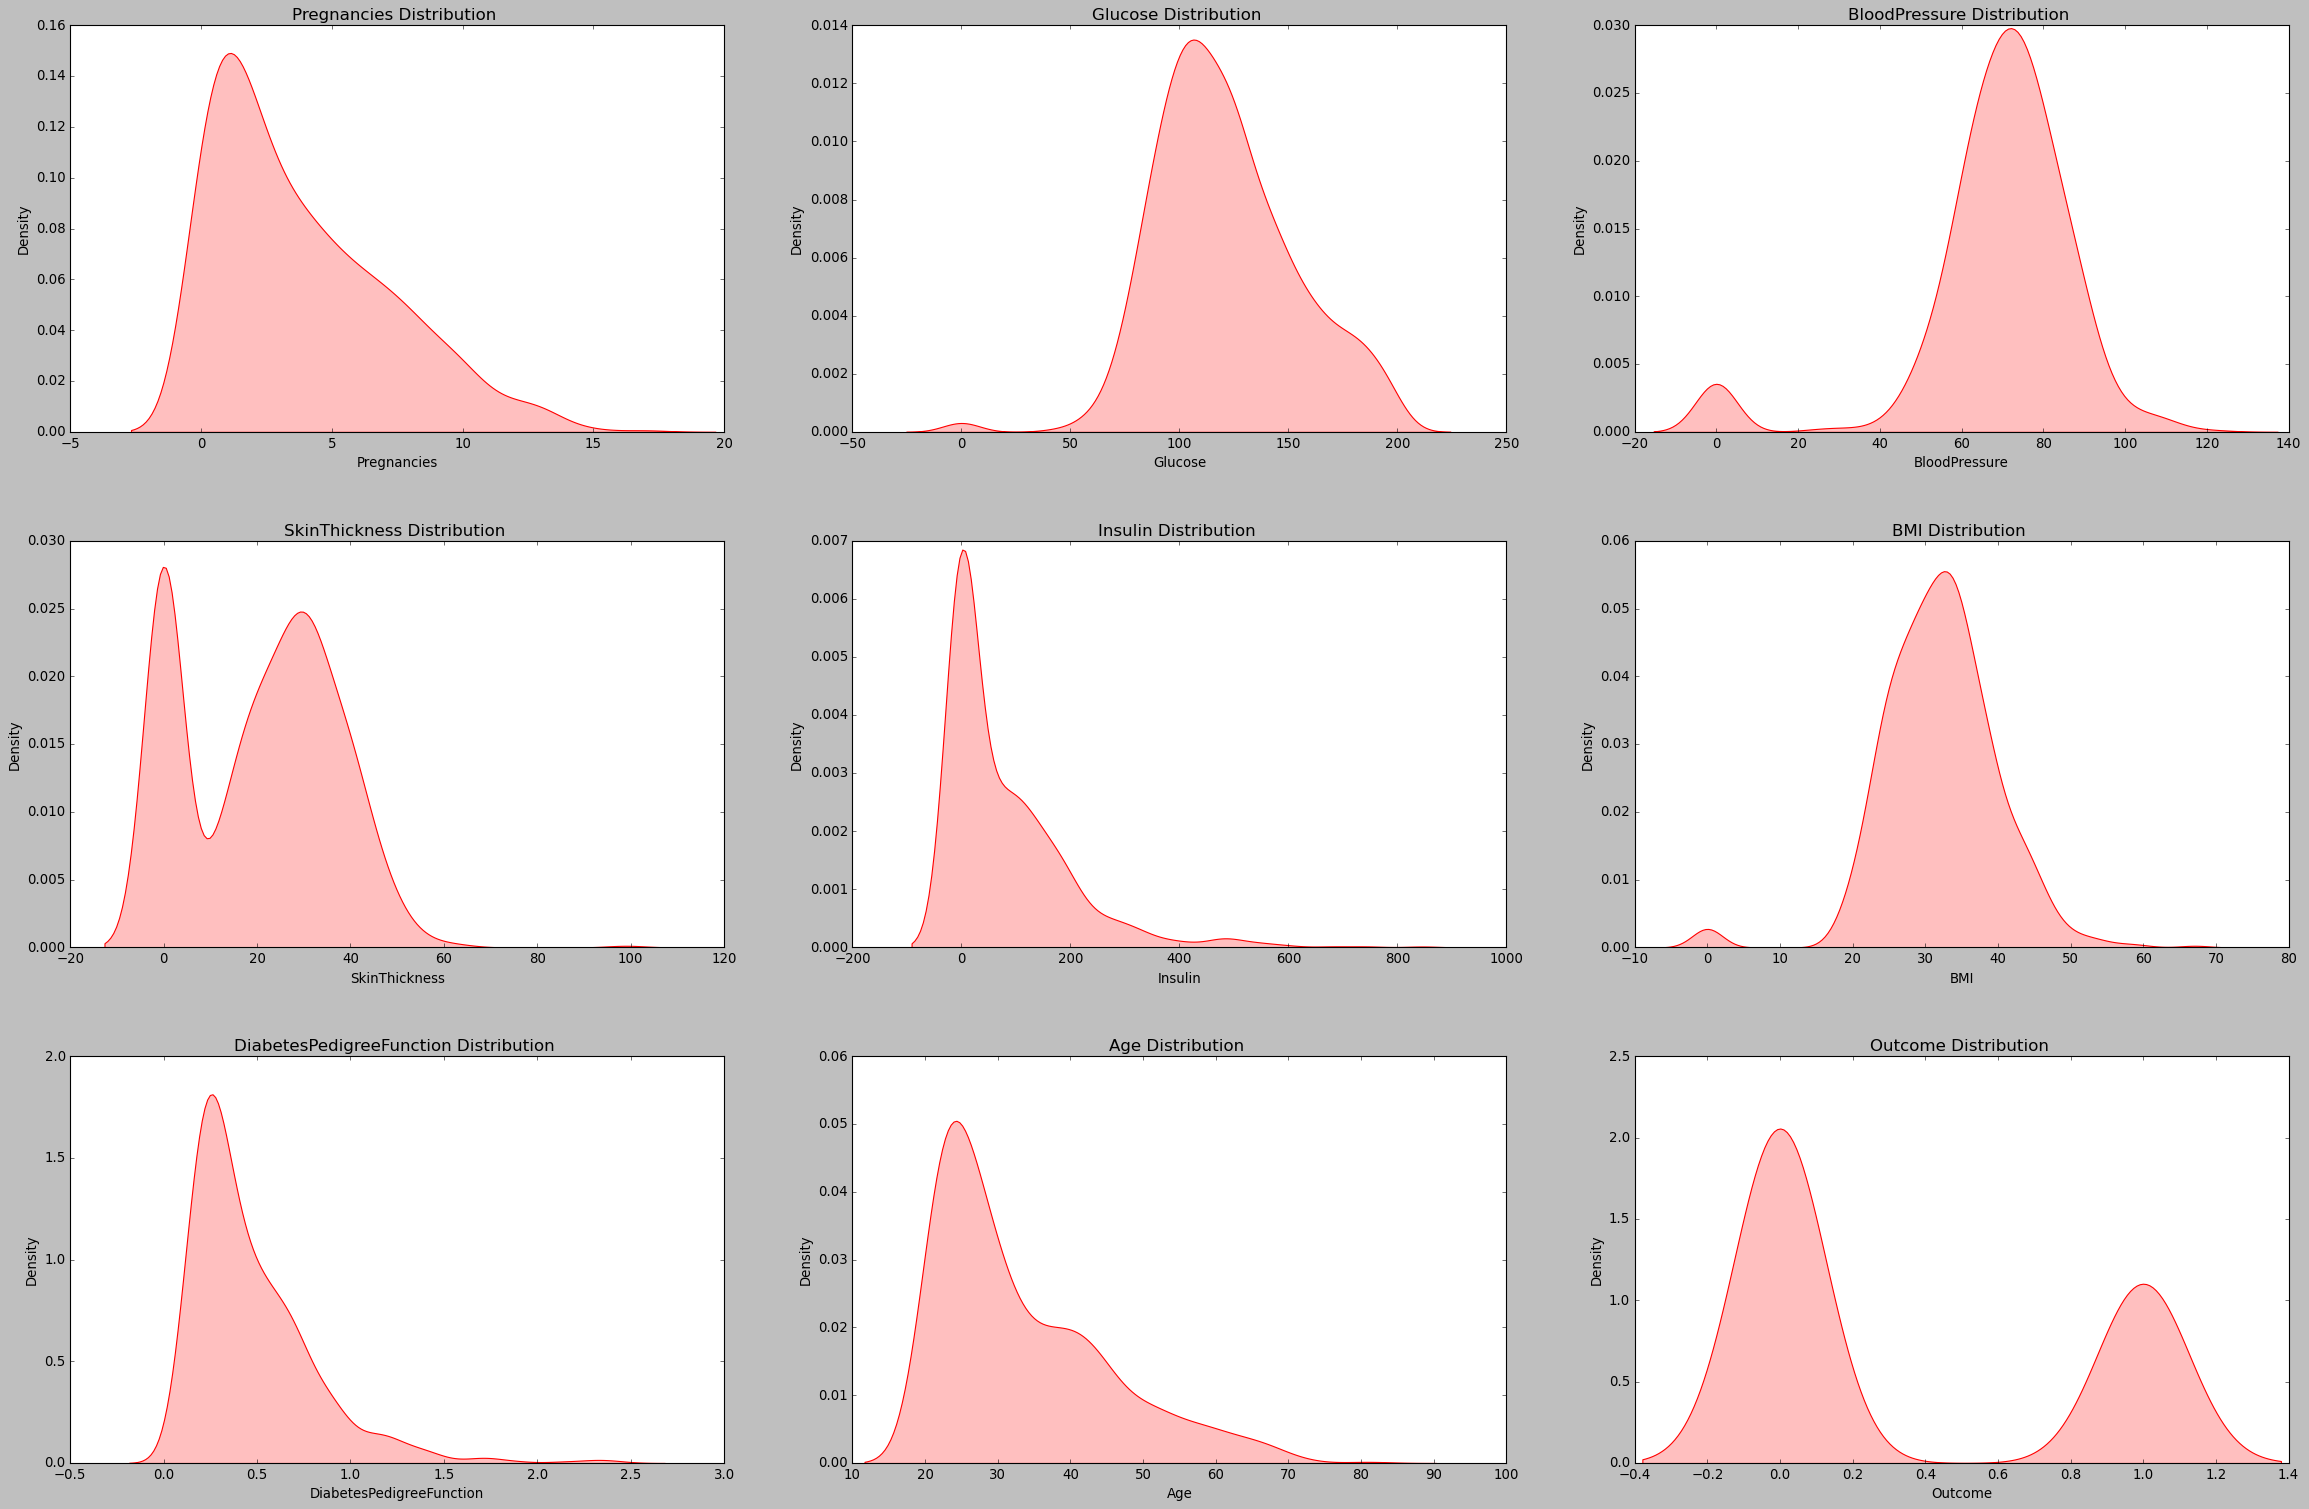

In [6]:
style.use('classic')

a = 3  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
plt.figure(figsize=(30,20))

for feature in df.columns:
    plt.subplot(a, b, c)
    sns.kdeplot(x = df[feature], fill=True, color="red").set_title(f'{feature} Distribution ',fontsize=15)
    c = c + 1
plt.tight_layout(pad = 4.0)
plt.show()

<font color = "blue" size=4.8px> <b>Interpretation : </b></font>

* <font color = "red" size=4.8px>Most Features are Not Normally Distrubuted</font>
* <font color = "red" size=4.8px>Thus we will Impute The Data Accordingly</font>
* <font color = "red" size=4.8px>Also We Will use Non-Linear Algorithms which doesnt expects Normal Distribution, for eg :- Tree based ensemble Techniques </font>    

<font color = "maroon" size=5px><b>2.4 Missing Value Imputation</b></font>

In [7]:
# Replacing Invalid Zeros with NaN Value For Imputation


df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [8]:
# Lets Check for Missing Values

pd.DataFrame({"Missing Values":df.isna().sum(),"Percentage":np.round(100*df.isna().sum()/df.shape[0],3)})

Missing Values  Percentage
Pregnancies                            0       0.000
Glucose                                5       0.651
BloodPressure                         35       4.557
SkinThickness                        227      29.557
Insulin                              374      48.698
BMI                                   11       1.432
DiabetesPedigreeFunction               0       0.000
Age                                    0       0.000
Outcome                                0       0.000

In [9]:
# Lets Impute The Missing Values Using KNN Imputer

knn_imputer= KNNImputer(n_neighbors=5)

df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = knn_imputer.fit_transform(df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']])

In [10]:
# CHecking for Missing Values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


<font color = "maroon" size=5px><b>2.5 Looking For Outliers</b></font>

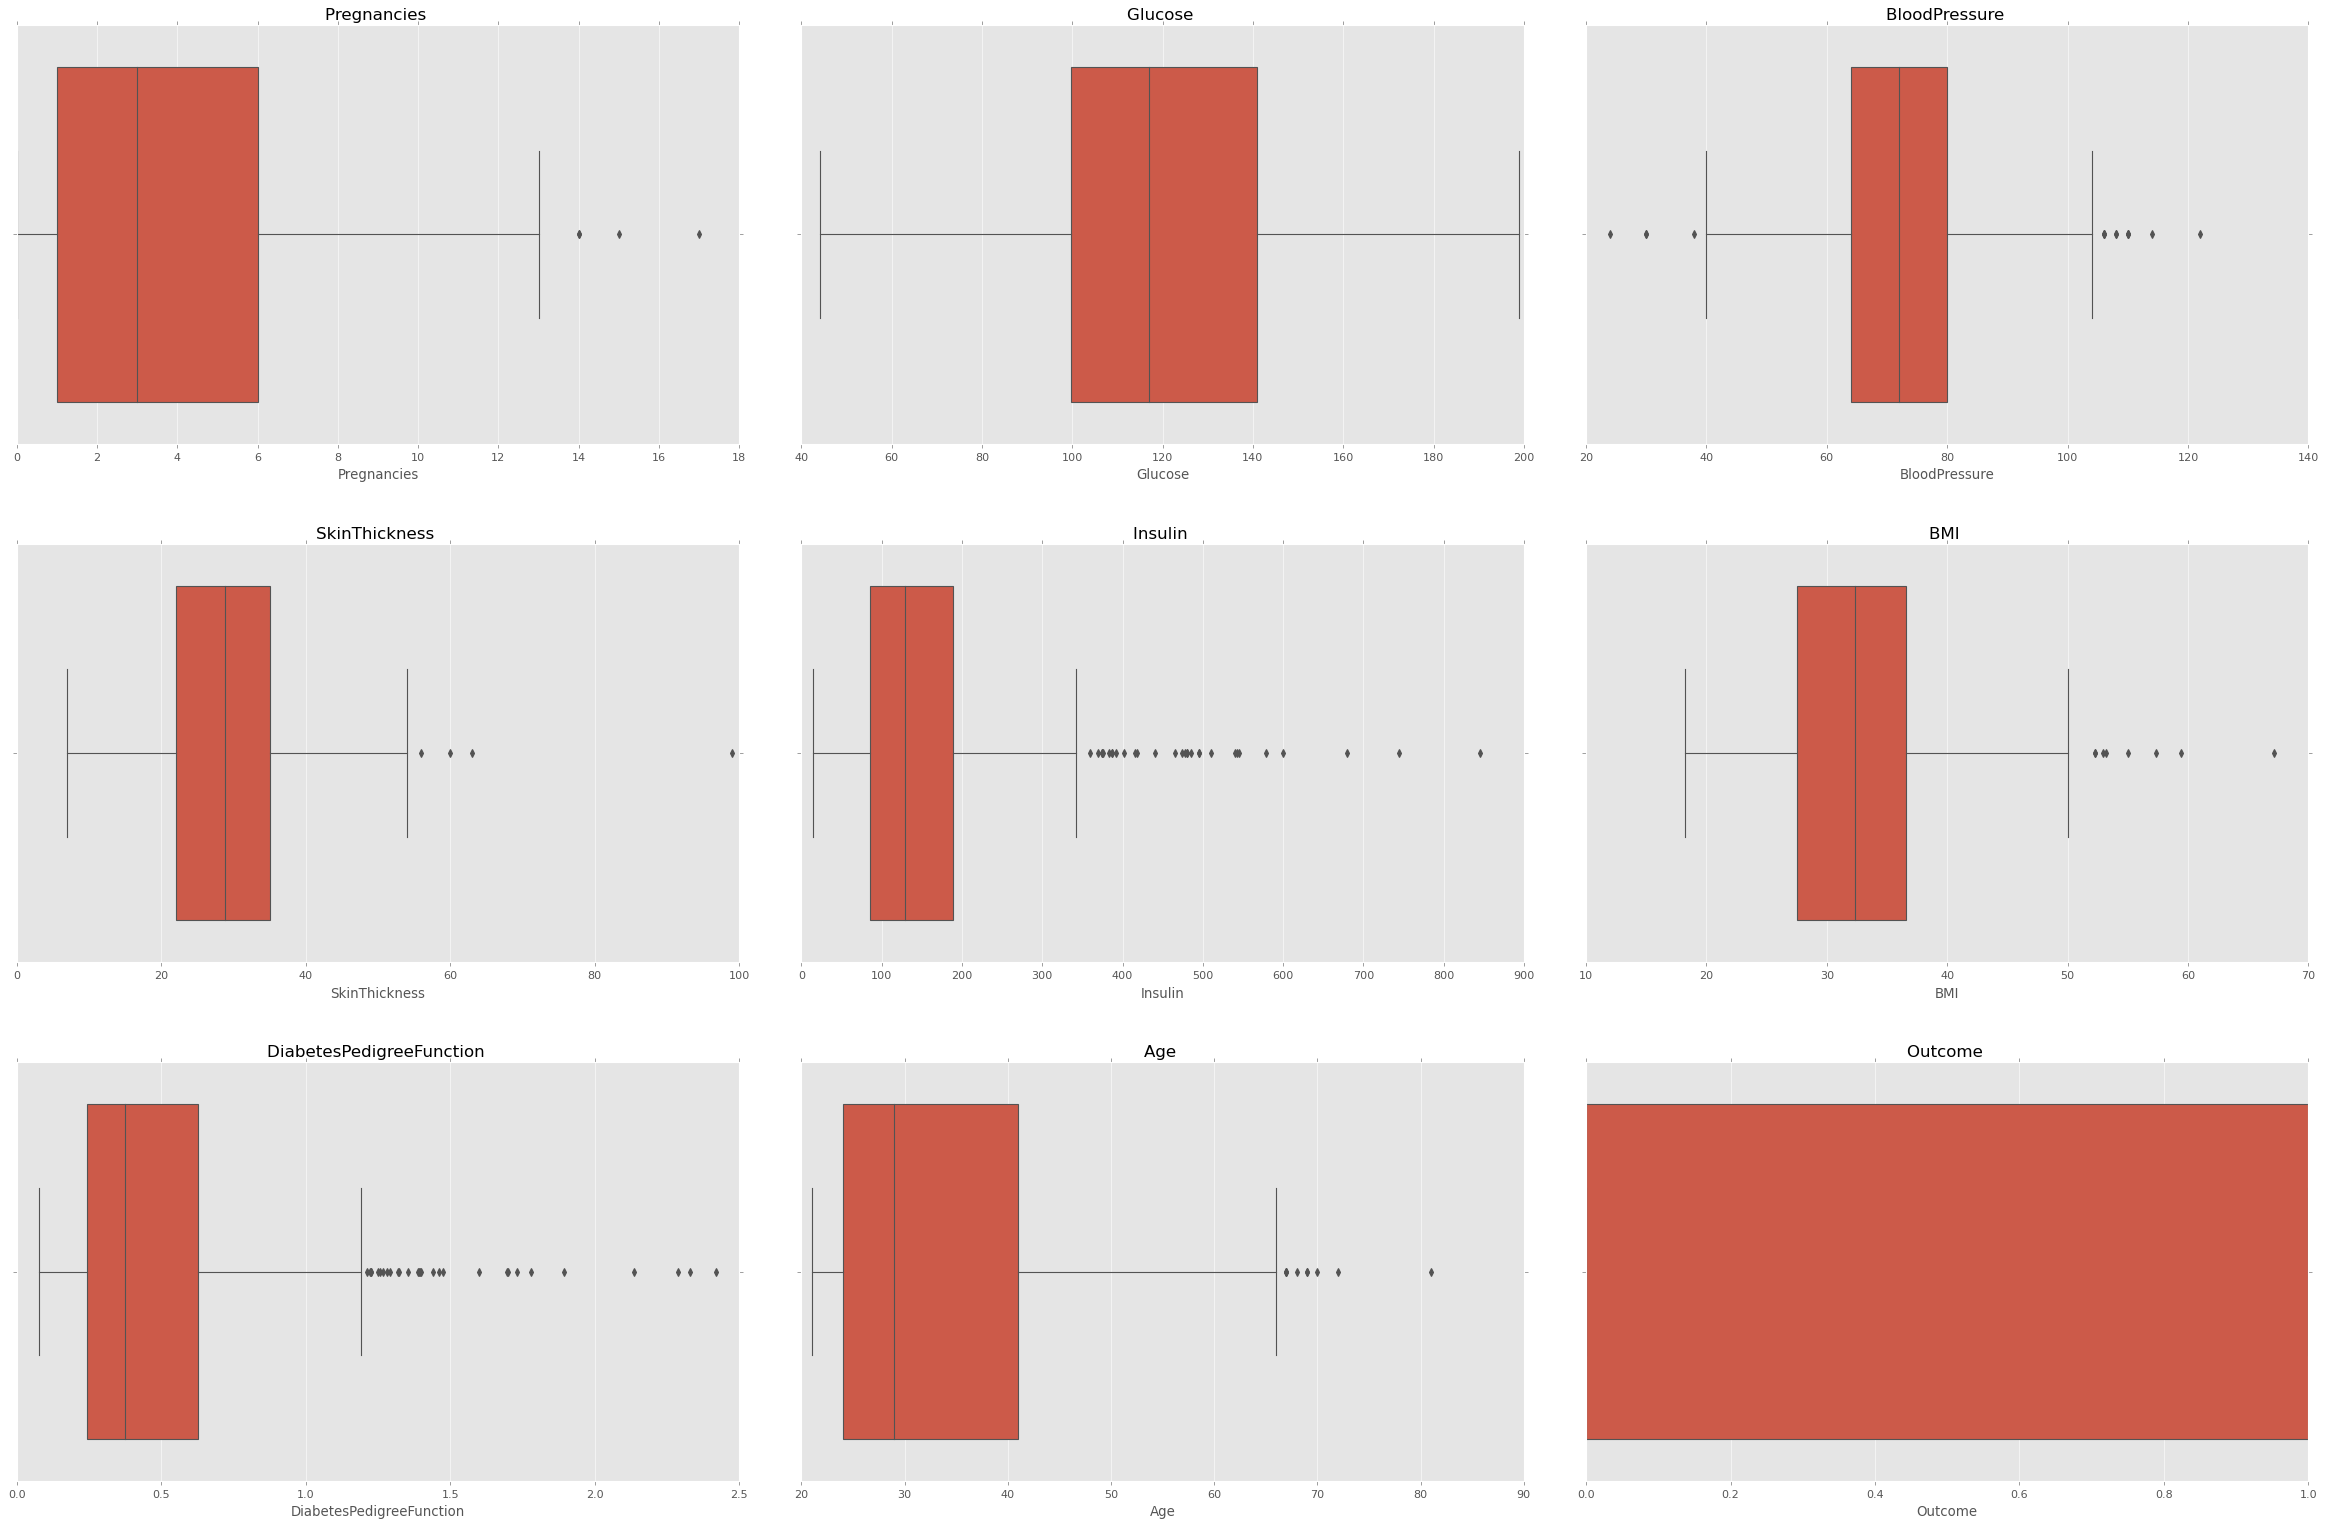

In [11]:
style.use('ggplot')

a = 3  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
plt.figure(figsize=(30,20))

for feature in df.columns:
    plt.subplot(a, b, c)
    sns.boxplot(x = df[feature]).set_title(f'{feature} ',fontsize=15)
    c = c + 1
plt.tight_layout(pad = 4.0)
plt.show()

<font color = "blue" size=4.8px> <b>Interpretation : </b></font>

* <font color = "red" size=4.8px>Insulin and DiabetesPedigreeFunction shows high amount of Outliers</font>
* <font color = "red" size=4.8px>better to use Non-Linear Approach such as  Spearman Correlation as its robust to outliers and using Algorithms which Are not affected by Outliers </font>

<hr>

<p>
    
<font color = "maroon" size=5px><b>2.6 plot describing the data types and the count of variables</b></font>

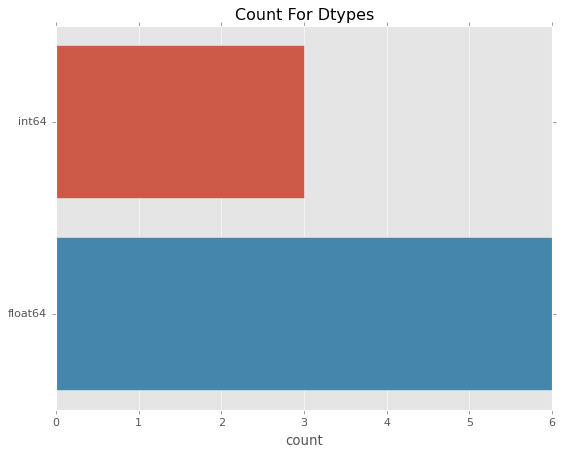

In [12]:
sns.countplot(y = df.dtypes).set_title("Count For Dtypes")
plt.show()

<font color = "blue" size=4.8px> <b>Interpretation : </b></font>

* <font color = "red" size=4.8px>No_of Integer Columns :- 6</font>
* <font color = "red" size=4.8px>No_of Float Columns :- 3</font>

<hr>

<p>
    
<font color = "maroon" size=5px><b>2.7 Lets Visualize Correlation Between Each Features</b></font>

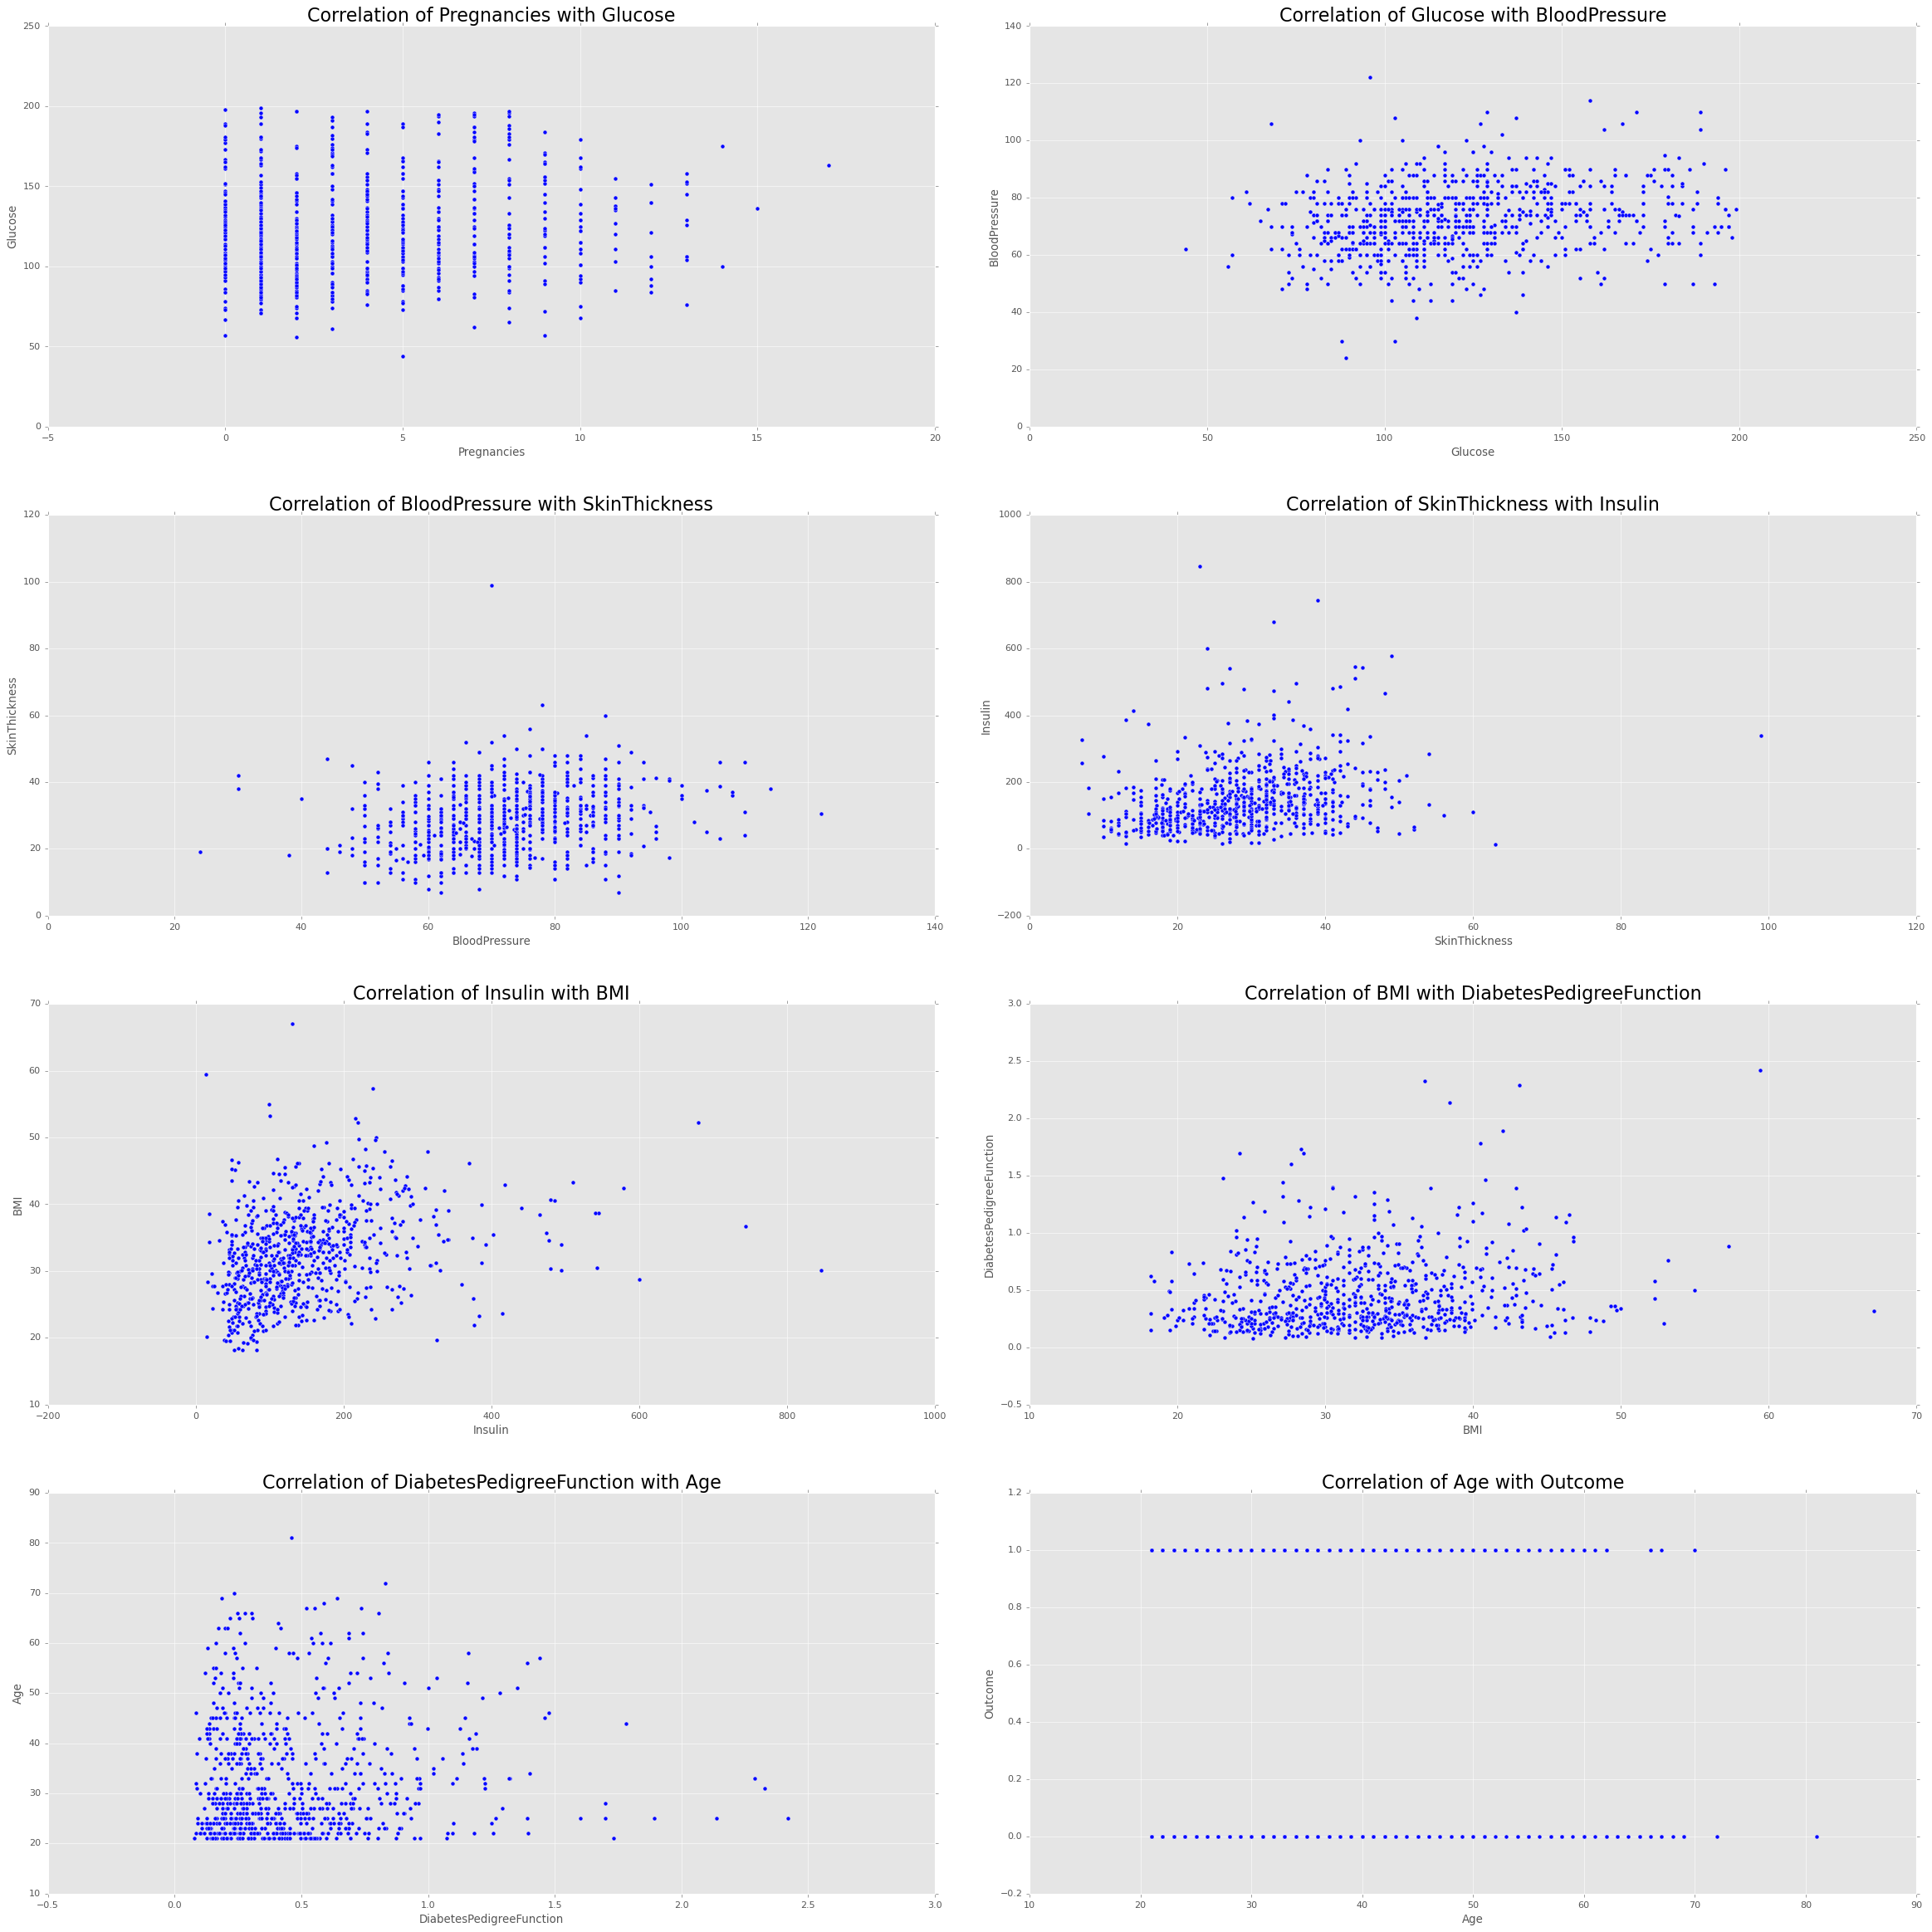

In [13]:
style.use('ggplot')

a = 4  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter
plt.figure(figsize=(30,30))

i = 0
for i in range(0, df.columns.nunique()-1):
    plt.subplot(a, b, c)
    sns.scatterplot(x = df.iloc[:,i], y =df.iloc[:,i+1] ).set_title(f'Correlation of {df.iloc[:,i].name} with {df.iloc[:,i+1].name}',fontsize=20)
    c = c + 1
plt.tight_layout(pad = 4.0)
plt.show()

<font color = "blue" size=4.8px> <b>Interpretation : </b></font>

* <font color = "red" size=4.8px>Body Mass Index and Insulin Shows some Positive Correlation, which is Obvious, Higher the body Mass higher the blood Insulin </font>
* <font color = "red" size=4.8px>Insulin and Skin Thickness hsows some Moderate to low Positive Correlation which makes sense as Isnulin tends to increase with BMI and BMI is directly Proportional to Skin Thickness</font>


<hr>

<p>
    
<font color = "maroon" size=5px><b>2.8 Correlation Analysis Via Heat Map</b></font>

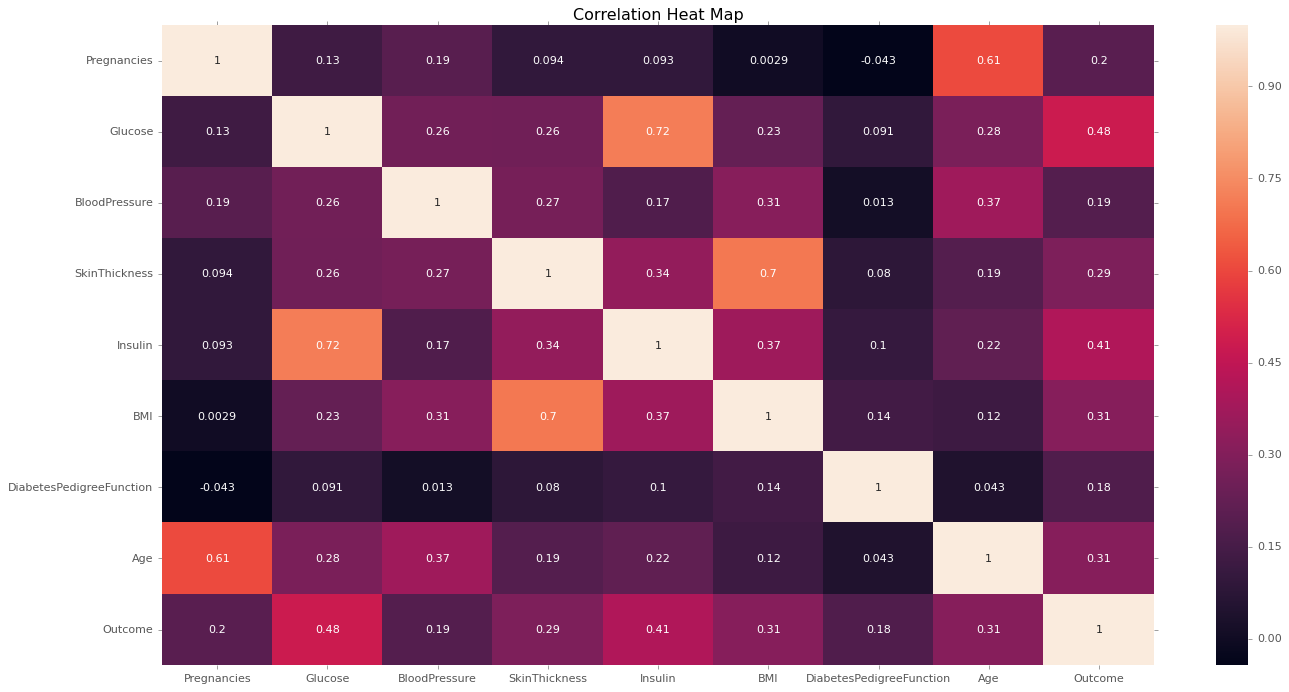

In [14]:
# Using Spearman Correlation as Data Contains Outliers

plt.figure(figsize=(20,10))
sns.heatmap(df.corr(method="spearman"), annot=True)
plt.title("Correlation Heat Map")
plt.show()

In [15]:
df.corr().style.background_gradient(cmap='viridis')

<font color = "blue" size=4.8px> <b>Interpretation : </b></font>

* <font color = "red" size=4.8px>There is High Correlation Among Features, but very less Correlation between Features and Target </font>



<hr>

<p>
    
<font color = "maroon" size=5px><b>2.9 Lets Check If Data Is Balanced Or Imbalanced</b></font>

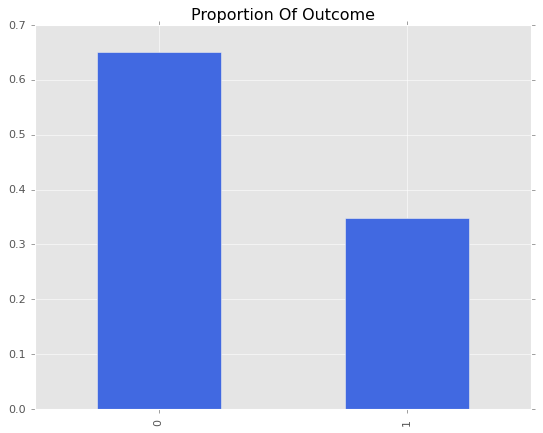

In [16]:
df.Outcome.value_counts(normalize=True).plot(kind='bar',color="royalblue")
plt.title("Proportion Of Outcome")
plt.show()

<font color = "blue" size=4.8px> <b>Interpretation : </b></font>

* <font color = "red" size=4.8px>65% - 35% Proportion Indicated Data is Imbalanced and Hence accuracy wont be a Good Measure , we will Look at Sensitivity, Specificity, AUC(ROC curve) </font>
* <font color = "red" size=4.8px>Also Tree Based  Algorithms Handles Imbalanced Data Pretty Well</font>


<hr>
    
<font color = "blue" size=6px><b><center>3. Devicing Strategy For Model Building</b></font>

* <p style = "color:b; font-size:150%; font-weight:bold; text-decoration: underline; text-decoration-style: double;"> So Far We have Arrived with Following Analysis : - </p>   
    
 
* Data is Skewed and has Lots of Outliers
* Data is Imbalanced
* Features Are Having Low Correlation with Target Variable
* No of Samples Are too low So We Cannot Use Hold Out Method Of Cross Validation, we need to use Kfolds And Also Class Proportion is Imbalanced so We need to Use Stratified Kfold For Our Cross Validation Analysis With Minimum 10 FOLDs


* <p style = "color:r; font-size:120%; font-weight:bold"> By these Inferences Its Evident that we should Use Tree Based Ensemble Techniques Which Can Handle Outliers, Skewed Data, Data Imbalances and Can Learn From Weak Learners

<hr>
    
<font color = "blue" size=6px><b><center>4. Model Building</b></font>

In [17]:
# Kfold

kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=101)

<font color = "blue" size=5px><b><center> 4.1. K-Nearest-Neighbors</b></font>

<font color = "maroon" size=4px><b>4.1.1 Standardization</b></font>


- <p style = "color:red; font-size:120%; font-weight:bold">Standardization is Necessary while Dealing with Algorithms Which works on Euclidean distances such as KNN</p>
- <p style = "color:red; font-size:120%; font-weight:bold">As there are Outliers In Data Set we Will Use RobustScalar As it is robust to Outliers</p>

In [18]:
Preprocessing = Pipeline(steps =[("Scaler",RobustScaler()),("KNN",KNeighborsClassifier(n_jobs=-1))])

In [19]:
# Separating Features And Target

Features = df.iloc[:,0:-1]
Target = df.iloc[:,-1]

In [20]:
# Defining Parameter Space

grid_param = {'KNN__n_neighbors': optuna.distributions.IntUniformDistribution(1,20,1),
             'KNN__weights': optuna.distributions.CategoricalDistribution(['uniform','distance']),
             'KNN__metric': optuna.distributions.CategoricalDistribution(['minkowski','euclidean','manhattan'])}

In [21]:
# Bayesian Hyperparameter Optimization Using Optuna

optuna_search =  OptunaSearchCV(estimator=Preprocessing, param_distributions = grid_param,
                                cv = kf, n_jobs = -1, n_trials=100, random_state = 101, refit = True,
                                scoring = 'roc_auc', verbose = 0)

optuna_search.fit(Features, Target)


[I 2021-09-21 12:02:34,572] A new study created in memory with name: no-name-a993a150-ec16-49cc-a457-51a52f8be7dd
[I 2021-09-21 12:02:45,229] Trial 2 finished with value: 0.8057792022792023 and parameters: {'KNN__n_neighbors': 9, 'KNN__weights': 'uniform', 'KNN__metric': 'euclidean'}. Best is trial 2 with value: 0.8057792022792023.
[I 2021-09-21 12:02:45,349] Trial 3 finished with value: 0.8138347578347579 and parameters: {'KNN__n_neighbors': 14, 'KNN__weights': 'distance', 'KNN__metric': 'minkowski'}. Best is trial 3 with value: 0.8138347578347579.
[I 2021-09-21 12:02:45,397] Trial 1 finished with value: 0.8124700854700855 and parameters: {'KNN__n_neighbors': 13, 'KNN__weights': 'uniform', 'KNN__metric': 'euclidean'}. Best is trial 3 with value: 0.8138347578347579.
[I 2021-09-21 12:02:45,645] Trial 0 finished with value: 0.793074074074074 and parameters: {'KNN__n_neighbors': 5, 'KNN__weights': 'uniform', 'KNN__metric': 'manhattan'}. Best is trial 3 with value: 0.8138347578347579.
[I 2

OptunaSearchCV(cv=StratifiedKFold(n_splits=10, random_state=101, shuffle=True),
               estimator=Pipeline(steps=[('Scaler', RobustScaler()),
                                         ('KNN',
                                          KNeighborsClassifier(n_jobs=-1))]),
               n_jobs=-1, n_trials=100,
               param_distributions={'KNN__metric': CategoricalDistribution(choices=('minkowski', 'euclidean', 'manhattan')),
                                    'KNN__n_neighbors': IntUniformDistribution(high=20, low=1, step=1),
                                    'KNN__weights': CategoricalDistribution(choices=('uniform', 'distance'))},
               random_state=101, scoring='roc_auc')

In [22]:
print(optuna_search.best_estimator_)
print(optuna_search.best_score_)

Pipeline(steps=[('Scaler', RobustScaler()),
                ('KNN', KNeighborsClassifier(n_jobs=-1, n_neighbors=19))])
0.8253760683760684


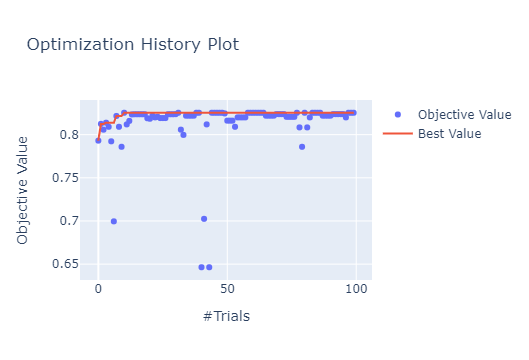

In [23]:
# Study History 

optuna.visualization.plot_optimization_history(optuna_search.study_)

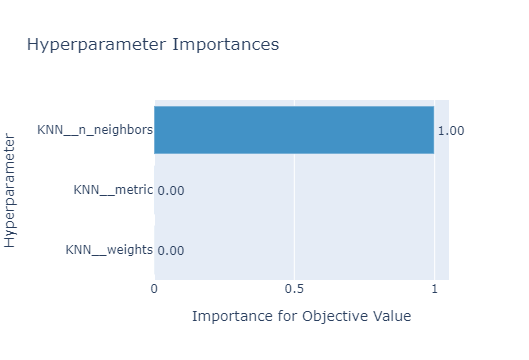

In [24]:
# Plotting Best Parametrs

optuna.visualization.plot_param_importances(optuna_search.study_)

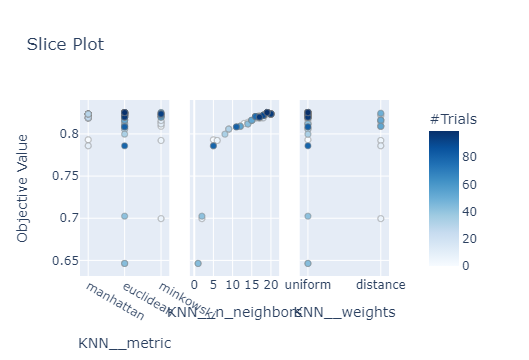

In [25]:
# Plotting Paramets Range

optuna.visualization.plot_slice(optuna_search.study_)

In [177]:
# Running The Model With Best Parameters

best_knn_model  = optuna_search.best_estimator_

# Training model

best_knn_model.fit(Features,Target)

# Calculating Cross Validation Score

Knn_AUC_ROC_Score = model_selection.cross_val_score(best_knn_model,Features, Target, scoring='roc_auc',cv = kf, n_jobs = -1)

print("\n AUC_ROC Score : ", np.mean(Knn_AUC_ROC_Score),"\n")

# Classification Report

print("Classification Report : \n\n" ,metrics.classification_report(Target, model_selection.cross_val_predict(best_knn_model,Features, Target,cv = kf, n_jobs = -1)))


 AUC_ROC Score :  0.8253760683760684 

Classification Report : 

               precision    recall  f1-score   support

           0       0.80      0.87      0.83       500
           1       0.70      0.59      0.64       268

    accuracy                           0.77       768
   macro avg       0.75      0.73      0.74       768
weighted avg       0.76      0.77      0.76       768



<font color = "blue" size=5px><b><center> 4.2.XGboost</b></font>

In [45]:
# Defining A Objecting Function For Hyper Paramater Tuning


def objective_xgb(trial, X, y, early_stopping_rounds):

    
    # Param Space
    
    params = {
        
        "verbosity" : 0,
        'eval_metric' : 'auc',
        "grow_policy" : trial.suggest_categorical("grow_policy",['depthwise', 'lossguide']),
        'tree_method':'gpu_hist',# Use GPU acceleration
        'predictor': 'gpu_predictor',
        "seed": 101,
        'n_jobs': -1,
        "alpha": trial.suggest_loguniform("alpha", 0.01, 10.0),
        "lambda": trial.suggest_loguniform("lambda", 1e-8, 10.0),
        "gamma": trial.suggest_loguniform("lambda", 1e-8, 10.0),
        "colsample_bytree": trial.suggest_loguniform("colsample_bytree", 0.2, 0.6),
        "subsample": trial.suggest_loguniform("subsample", 0.5, 0.8),
        "learning_rate": trial.suggest_loguniform("learning_rate", 0.005, 0.05),
        'n_estimators': 10000,
        'max_depth': trial.suggest_int("max_depth", 1,20,log = True),
        "min_child_weight": trial.suggest_loguniform("min_child_weight", 1, 300)
    }
    
    
    # Call Back For pruning unpromising trails
    pruning_callback = optuna.integration.XGBoostPruningCallback(trial, "validation_0-auc")
    model = XGBClassifier(**params)
    Metrics = [] # To store the AUC Scores
    
    # Cross_validation Loop:
    
    for train_index, test_index in kf.split(X,y):
        
        # Setting Training and Testing Sets For Each Folds
        x_train, x_test = Features.iloc[train_index, :], Features.iloc[test_index, :]
        y_train, y_test = Target.iloc[train_index], Target.iloc[test_index]
        
        # Fitting The Model on Each Fold
        model.fit(x_train, y_train,
                 eval_set = [(x_test, y_test)],
                 eval_metric = 'auc',
                 verbose = 0,
                 callbacks = [pruning_callback],
                 early_stopping_rounds = early_stopping_rounds
                 )
        
        # Prediction for Each Fold
        y_pred = model.predict(x_test)
        
        # Appending AUC Scores For Each Test Fold
        Metrics.append(metrics.roc_auc_score(y_test,y_pred))
        
    return(np.mean(Metrics))

In [46]:
# Creating Optuna Study
study_xgb = optuna.create_study(direction="maximize")

study_xgb.optimize(lambda trial : objective_xgb(trial, X=Features, y=Target, early_stopping_rounds=400),
                   n_trials=100, show_progress_bar=True)

[I 2021-09-21 13:03:09,951] A new study created in memory with name: no-name-ce4ce33e-d546-4493-bef9-c641719da490


  0%|          | 0/100 [00:00<?, ?it/s]

[W 2021-09-21 13:03:10,089] Trial 0 failed because of the following error: XGBoostError('[13:03:10] c:\\ci\\xgboost-split_1619728435298\\work\\src\\common\\common.h:156: XGBoost version not compiled with GPU support.')
Traceback (most recent call last):
  File "C:\Users\jaysr\anaconda3\lib\site-packages\optuna\_optimize.py", line 216, in _run_trial
    value_or_values = func(trial)
  File "<ipython-input-46-f348f80add6b>", line 4, in <lambda>
    study_xgb.optimize(lambda trial : objective_xgb(trial, X=Features, y=Target, early_stopping_rounds=400),
  File "<ipython-input-45-bfbf2dcfc435>", line 44, in objective_xgb
    model.fit(x_train, y_train,
  File "C:\Users\jaysr\anaconda3\lib\site-packages\xgboost\core.py", line 422, in inner_f
    return f(**kwargs)
  File "C:\Users\jaysr\anaconda3\lib\site-packages\xgboost\sklearn.py", line 909, in fit
    self._Booster = train(xgb_options, train_dmatrix,
  File "C:\Users\jaysr\anaconda3\lib\site-packages\xgboost\training.py", line 227, in tr

XGBoostError: [13:03:10] c:\ci\xgboost-split_1619728435298\work\src\common\common.h:156: XGBoost version not compiled with GPU support.